#### This notebook demonstrates the market data generation process for European Call Option (NDX)

In [1]:
# pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 KB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 KB 11.6 MB/s eta 0:00:00
  Using cached lxml-5.2.2-cp310-cp310-manylinux_2_28_x86_64.whl (5.0 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 37.2 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for peewee: filename=peewee-3.17.5-py3-none-any.whl size=138635 sha256=4608e9712b17075ea9f0f476c7e6fc83eaac126b0dfc81df0db51b2bc70b9ada
  Stored in directory: /home/mukul/.cache/pip/wheels/06/80/9b/98db0d58349a2f5c09f8406789ade4270762f97b7d26f2fa22
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:
ndx_data = yf.download("NDX", start='2021-06-14', end='2022-06-28')
ndx_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-14,14128.200195,14128.200195,14128.200195,14128.200195,14128.200195,0
2021-06-15,14030.410156,14030.410156,14030.410156,14030.410156,14030.410156,0
2021-06-16,13983.009766,13983.009766,13983.009766,13983.009766,13983.009766,0
2021-06-17,14163.809570,14163.809570,14163.809570,14163.809570,14163.809570,0
2021-06-18,14049.580078,14049.580078,14049.580078,14049.580078,14049.580078,0


In [4]:
ndx_call_data = pd.read_csv("./wharton_data/df_eur_call_NDX_jun2021.csv")
ndx_call_data.head()

,Unnamed: 0,secid,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,...,index_flag,exchange_d,class,issue_type,industry_group,issuer,div_convention,exercise_style,am_set_flag,current_time
0,1233952,102480,2021-06-21,NDX 220617C15700000,1,2022-06-17,2021-05-20,C,15700000,493.5,...,1,32768,NaN,A,NaN,NASDAQ 100 INDEX,I,E,NaN,0.989041
1,1247280,102480,2021-06-22,NDX 220617C15700000,1,2022-06-17,2021-05-20,C,15700000,530.6,...,1,32768,NaN,A,NaN,NASDAQ 100 INDEX,I,E,NaN,0.986301
2,1260302,102480,2021-06-23,NDX 220617C15700000,1,2022-06-17,2021-05-20,C,15700000,515.7,...,1,32768,NaN,A,NaN,NASDAQ 100 INDEX,I,E,NaN,0.983562
3,1274228,102480,2021-06-24,NDX 220617C15700000,1,2022-06-17,2021-05-20,C,15700000,552.5,...,1,32768,NaN,A,NaN,NASDAQ 100 INDEX,I,E,NaN,0.980822
4,1288162,102480,2021-06-25,NDX 220617C15700000,1,2022-06-17,2021-05-20,C,15700000,539.3,...,1,32768,NaN,A,NaN,NASDAQ 100 INDEX,I,E,NaN,0.978082


In [5]:
ndx_data.reset_index().dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [6]:
ndx_call_data["date"]=pd.to_datetime(ndx_call_data["date"])

In [7]:
ndx_call1 = ndx_call_data.merge(ndx_data.reset_index(),left_on="date",right_on="Date",suffixes=("","_NDX"))
ndx_call1.head()

,Unnamed: 0,secid,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,...,exercise_style,am_set_flag,current_time,Date,Open,High,Low,Close,Adj Close,Volume
0,1233952,102480,2021-06-21,NDX 220617C15700000,1,2022-06-17,2021-05-20,C,15700000,493.5,...,E,NaN,0.989041,2021-06-21,14137.230469,14137.230469,14137.230469,14137.230469,14137.230469,0
1,1247280,102480,2021-06-22,NDX 220617C15700000,1,2022-06-17,2021-05-20,C,15700000,530.6,...,E,NaN,0.986301,2021-06-22,14270.419922,14270.419922,14270.419922,14270.419922,14270.419922,0
2,1260302,102480,2021-06-23,NDX 220617C15700000,1,2022-06-17,2021-05-20,C,15700000,515.7,...,E,NaN,0.983562,2021-06-23,14274.240234,14274.240234,14274.240234,14274.240234,14274.240234,0
3,1274228,102480,2021-06-24,NDX 220617C15700000,1,2022-06-17,2021-05-20,C,15700000,552.5,...,E,NaN,0.980822,2021-06-24,14365.959961,14365.959961,14365.959961,14365.959961,14365.959961,0
4,1288162,102480,2021-06-25,NDX 220617C15700000,1,2022-06-17,2021-05-20,C,15700000,539.3,...,E,NaN,0.978082,2021-06-25,14345.179688,14345.179688,14345.179688,14345.179688,14345.179688,0


In [8]:
call_data = ndx_call1[["Adj Close","current_time","strike_price","best_bid","best_offer","ticker","impl_volatility"]]
call_data["strike_price"] = call_data["strike_price"]/1000
call_data["market_price"] = (call_data["best_bid"]+call_data["best_offer"])/2
call_data = call_data.rename(columns={"Adj Close":"spot_price"})
call_data.head()

/tmp/ipykernel_761686/847771682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  call_data["strike_price"] = call_data["strike_price"]/1000
/tmp/ipykernel_761686/847771682.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  call_data["market_price"] = (call_data["best_bid"]+call_data["best_offer"])/2


,spot_price,current_time,strike_price,best_bid,best_offer,ticker,impl_volatility,market_price
0,14137.230469,0.989041,15700.0,493.5,528.5,NDX,0.196978,511.00
1,14270.419922,0.986301,15700.0,530.6,557.9,NDX,0.195356,544.25
2,14274.240234,0.983562,15700.0,515.7,544.3,NDX,0.192452,530.00
3,14365.959961,0.980822,15700.0,552.5,592.4,NDX,0.194887,572.45
4,14345.179688,0.978082,15700.0,539.3,575.6,NDX,0.193641,557.45


In [9]:
call_data.mean(numeric_only=True)

spot_price         14694.593309
current_time           0.498091
strike_price       15700.000000
best_bid             654.208787
best_offer           670.446653
impl_volatility        0.254684
market_price         662.327720
dtype: float64

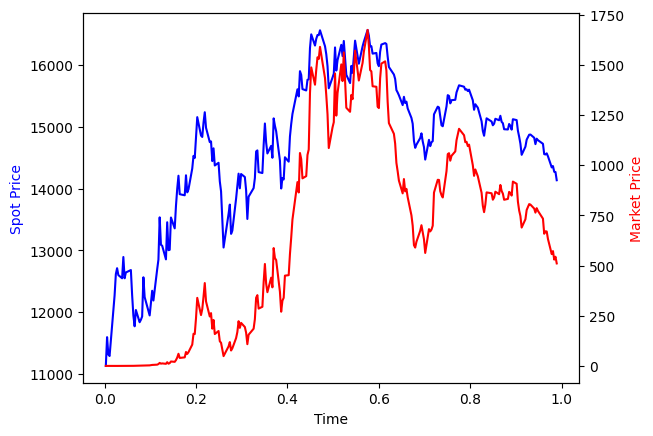

In [11]:
fig, ax1 = plt.subplots()

# Plot the "Spot Price" on the left axis
ax1.plot(call_data["current_time"], call_data["spot_price"], label="Spot Price", color="blue")
ax1.set_xlabel('Time')
ax1.set_ylabel('Spot Price', color="blue")
ax2 = ax1.twinx()
# ax1.legend()

# Plot the "Market Price" on the right axis
ax2.plot(call_data["current_time"], call_data["market_price"], label="Market Price", color="red")
ax2.set_ylabel('Market Price', color="red")
# plt.title("NDX Spot Price and European Call price")
# plt.savefig("Market_data.png")
# ax2.legend()

In [23]:
call_data.to_csv("NDX_call_data.csv")

In [25]:
call_data.std(numeric_only=True)

spot_price         1207.976717
current_time          0.286294
strike_price          0.000000
best_bid            489.270553
best_offer          496.745189
impl_volatility       0.146953
market_price        492.989815
dtype: float64

#### For risk free rate

In [2]:
treasury_yield_data = yf.download("^IRX", start='2021-06-14', end='2022-06-28')
treasury_yield_data.mean()

[*********************100%%**********************]  1 of 1 completed


Open         0.317221
High         0.325519
Low          0.306634
Close        0.317248
Adj Close    0.317248
Volume       0.000000
dtype: float64